In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tf_keras as keras
import cv2
import pathlib
import zipfile

2024-12-21 23:30:09.042997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734802209.143333  314207 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734802209.170745  314207 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 23:30:09.357174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
DATA_URL = "https://www.kaggle.com/api/v1/datasets/download/devdope/skin-disease-raw-dataset"

download_dir = keras.utils.get_file(
    "skin_diseases.zip",
    DATA_URL,
    extract=True,
    cache_dir='.'
)
data_dir = pathlib.Path(download_dir).with_suffix('')
print(data_dir)

In [3]:
data_dir = pathlib.Path("datasets/Raw_Dataset")
print(data_dir)

datasets/Raw_Dataset


In [4]:
print(list(data_dir.glob('*/*.jpg')))

[PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (76).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (77).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (78).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (79).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (8).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (80).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (81).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (82).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (83).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (84).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (85).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPox (86).jpg'), PosixPath('datasets/Raw_Dataset/ch_Chickenpox_Varicela/ChickenPo

In [5]:
class_names = list(data_dir.glob('*'))
class_names = [item.name for item in class_names if item.is_dir()]
print(class_names)

['ch_Chickenpox_Varicela', 'hz_Herpes', 'lp_Lupus', 'me_Melanoma', 'mk_Monkeypox', 'ms_Measles_Sarampion', 'sc_Scabies_sarna']


In [6]:
BATCH_SIZE = 32

IMG_SIZE = (256, 256)

Delete invalid/corrupted images

In [ ]:
# Path to your dataset directory
dataset_dir = data_dir

# Check all files for validity
for root, _, files in os.walk(dataset_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = tf.io.read_file(file_path)
            img = tf.image.decode_image(
                img, channels=3)  # Try opening the file
        except Exception as e:
            print(f"Invalid file: {file_path} - {e}")
            os.remove(file_path)  # Remove the file

I0000 00:00:1733385210.282209    5997 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1733385210.282889    5997 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2024-12-05 13:53:30.893721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-05 13:53:30.893756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-12-05 13:53:38.550839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


In [8]:
raw_dataset: tf.data.Dataset = keras.utils.image_dataset_from_directory(
    data_dir, labels='inferred', image_size=IMG_SIZE, seed=123, batch_size=1, shuffle=True,)

Found 3328 files belonging to 7 classes.


2024-12-21 16:29:10.810877: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-12-21 16:29:10.811211: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: rayat69-ROG-Strix-G513IM-G513IM
2024-12-21 16:29:10.811228: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: rayat69-ROG-Strix-G513IM-G513IM
2024-12-21 16:29:10.811826: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2024-12-21 16:29:10.811952: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2024-12-21 16:29:10.811963: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0


In [9]:
class_names = raw_dataset.class_names
class_names

['ch_Chickenpox_Varicela',
 'hz_Herpes',
 'lp_Lupus',
 'me_Melanoma',
 'mk_Monkeypox',
 'ms_Measles_Sarampion',
 'sc_Scabies_sarna']

In [10]:
scbs_dir = data_dir / class_names[-1]
print(len(list(scbs_dir.glob('*'))))

266


In [11]:
def categorical_to_binary(image, label):
    return image, tf.where(label == (len(class_names) - 1), 1, 0)

In [16]:
modified_dataset = raw_dataset.map(categorical_to_binary)
modified_dataset.class_names = ['Non-Scabies', 'Scabies']

In [17]:
# Count samples per class
class_counts = {0: 0, 1: 0}
for _, label in modified_dataset:
    class_counts[int(label.numpy())] += 1

print("Class Counts:", class_counts)

/tmp/ipykernel_119889/3877593876.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_counts[int(label.numpy())] += 1
2024-12-21 16:29:57.606149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-12-21 16:29:59.910117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-21 16:29:59.910198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


Class Counts: {0: 3062, 1: 266}


2024-12-21 16:30:01.022827: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
ds_cardinality = tf.data.experimental.cardinality(modified_dataset).numpy()
modified_dataset = modified_dataset.unbatch()
print(ds_cardinality)
train_size = int(0.80 * ds_cardinality)
val_size = int(0.125 * ds_cardinality)

train_ds = modified_dataset.take(train_size)
test_ds = modified_dataset.skip(train_size)

3328


In [19]:
# Count samples per class
train_class_counts = {0: 0, 1: 0}
for _, label in train_ds:
    train_class_counts[int(label.numpy())] += 1

print("Class Counts:", train_class_counts)

2024-12-21 16:30:08.519086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Class Counts: {0: 2446, 1: 216}


In [9]:
@keras.saving.register_keras_serializable("disease_detection")
class ScabiesNet(keras.Model):
    def __init__(self, pretrained: bool = False, minimalistic: bool = False, **kwargs):
        super(ScabiesNet, self).__init__(**kwargs)
        # augmentation
        self.data_augmentation = keras.Sequential([
            keras.layers.RandomFlip(
                'horizontal_and_vertical', input_shape=(*IMG_SIZE, 3)),
            keras.layers.RandomRotation(0.1),
            keras.layers.RandomZoom(0.1),
            keras.layers.RandomBrightness(0.1),
            keras.layers.RandomContrast(0.1),
        ], name="data_augmentation")
        self.process_input = keras.applications.mobilenet_v3.preprocess_input
        self.base_model = keras.applications.MobileNetV3Large(
            input_shape=(*IMG_SIZE, 3),
            include_top=False,
            weights='imagenet' if pretrained else None,
            minimalistic=minimalistic,
        )
        self.pretrained = pretrained
        self.base_model.trainable = not pretrained
        # output layers
        self.global_avg_layer = keras.layers.GlobalAveragePooling2D()
        self.drpoout_layer = keras.layers.Dropout(0.2)
        self.dense_layer = keras.layers.Dense(
            128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))
        self.prediction_layer = keras.layers.Dense(
            1, activation='sigmoid', name="binary_output",)

    def call(self, inputs):
        x = self.data_augmentation(inputs)
        x = self.process_input(x)
        x = self.base_model(x, training=not self.pretrained)
        x = self.global_avg_layer(x)
        x = self.drpoout_layer(x)
        x = self.dense_layer(x)
        return self.prediction_layer(x)

In [10]:
model_1 = ScabiesNet(name="scabies_net_2", pretrained=True)

In [11]:
model_1.build((None, *IMG_SIZE, 3))

In [12]:
model_1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)

In [13]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
)

In [28]:
balanced_dataset = None
class_0_dataset = None
class_1_dataset = None
oversampled_class_0 = None
oversampled_class_1 = None
raw_dataset = None
label_batch = None
image_batch = None
masked_images = None
masked_batch = None
mod_ds_2 = None
pred_mask = None

In [24]:
cardinality = test_ds_2.cardinality().numpy()
print(cardinality)
train_size = int(0.80 * cardinality)
print(train_size)
train_ds = test_ds_2.take(train_size).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = test_ds_2.skip(train_size).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds, val_ds

84
67


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [21]:
np.array(test_ds_2.as_numpy_iterator()).flatten()

array([NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7a0476b5ec80>)],
      dtype=object)

In [26]:
history_1 = model_1.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    # validation_split=0.2,
    # batch_size=BATCH_SIZE,
    # shuffle=True,
    # callbacks=[early_stopping],
    class_weight={0: 1, 1: 10},
)

Epoch 1/50
67/67 [==============================] - 62s 935ms/step - loss: 1.1474 - accuracy: 0.6735 - val_loss: 0.8099 - val_accuracy: 0.5174
Epoch 2/50
67/67 [==============================] - 62s 929ms/step - loss: 1.1531 - accuracy: 0.6530 - val_loss: 0.6895 - val_accuracy: 0.7413
Epoch 3/50
67/67 [==============================] - 62s 927ms/step - loss: 1.0980 - accuracy: 0.6600 - val_loss: 0.5786 - val_accuracy: 0.8108
Epoch 4/50
67/67 [==============================] - 77s 1s/step - loss: 1.0513 - accuracy: 0.7136 - val_loss: 0.6968 - val_accuracy: 0.6293
Epoch 5/50
67/67 [==============================] - 82s 1s/step - loss: 1.0646 - accuracy: 0.6945 - val_loss: 0.7925 - val_accuracy: 0.6544
Epoch 6/50
67/67 [==============================] - 73s 1s/step - loss: 1.0341 - accuracy: 0.6894 - val_loss: 0.5887 - val_accuracy: 0.7124
Epoch 7/50
67/67 [==============================] - 64s 950ms/step - loss: 1.0315 - accuracy: 0.6987 - val_loss: 0.8380 - val_accuracy: 0.5328
Epoch 8/

In [27]:
def plot_history(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(16, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

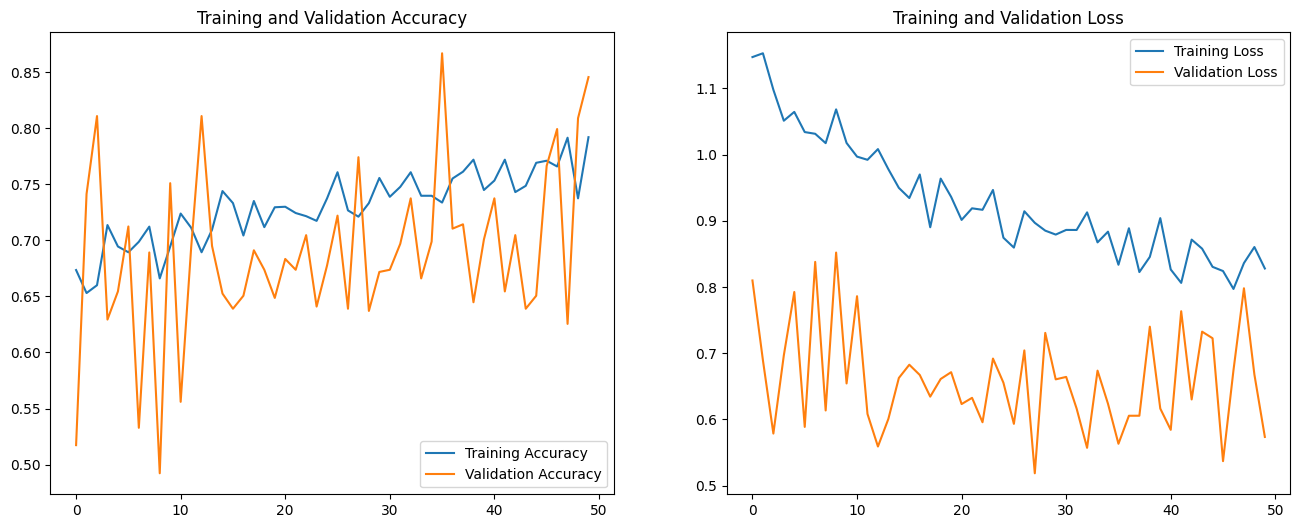

In [28]:
plot_history(history_1, epochs=len(history_1.epoch))

In [35]:
# Unfreeze the base model
model_1.base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_1.base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again with unfreezed top layers
model_1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001/10),
    metrics=['accuracy'],
)

# Fine-tune the model
history_1_fine = model_1.fit(
    train_ds,
    epochs=40,
    initial_epoch=len(history_1.epoch),
    validation_data=val_ds,
    # callbacks=[early_stopping],
)

Epoch 21/40


82/82 [==============================] - 20s 80ms/step - loss: 0.5979 - accuracy: 0.6623 - val_loss: 0.8516 - val_accuracy: 0.4137
Epoch 22/40
82/82 [==============================] - 4s 47ms/step - loss: 0.5586 - accuracy: 0.6983 - val_loss: 0.7039 - val_accuracy: 0.5546
Epoch 23/40
82/82 [==============================] - 4s 47ms/step - loss: 0.5299 - accuracy: 0.7175 - val_loss: 0.6193 - val_accuracy: 0.6772
Epoch 24/40
82/82 [==============================] - 4s 48ms/step - loss: 0.5143 - accuracy: 0.7272 - val_loss: 0.7129 - val_accuracy: 0.5444
Epoch 25/40
82/82 [==============================] - 4s 49ms/step - loss: 0.4797 - accuracy: 0.7594 - val_loss: 0.5499 - val_accuracy: 0.7406
Epoch 26/40
82/82 [==============================] - 4s 51ms/step - loss: 0.4783 - accuracy: 0.7522 - val_loss: 0.5489 - val_accuracy: 0.7171
Epoch 27/40
82/82 [==============================] - 4s 51ms/step - loss: 0.4599 - accuracy: 0.7699 - val_loss: 0.6893 - val_accuracy: 0.6037
Epoch 28/40
82/82

In [36]:
def plot_fine_history(history, history_fine, initial_epochs, final_epochs):
  epochs = initial_epochs + final_epochs
  acc = history.history['accuracy'] + history_fine.history['accuracy']
  val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

  loss = history.history['loss'] + history_fine.history['loss']
  val_loss = history.history['val_loss'] + history_fine.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(16, 10))
  plt.subplot(2, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
           plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
           plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

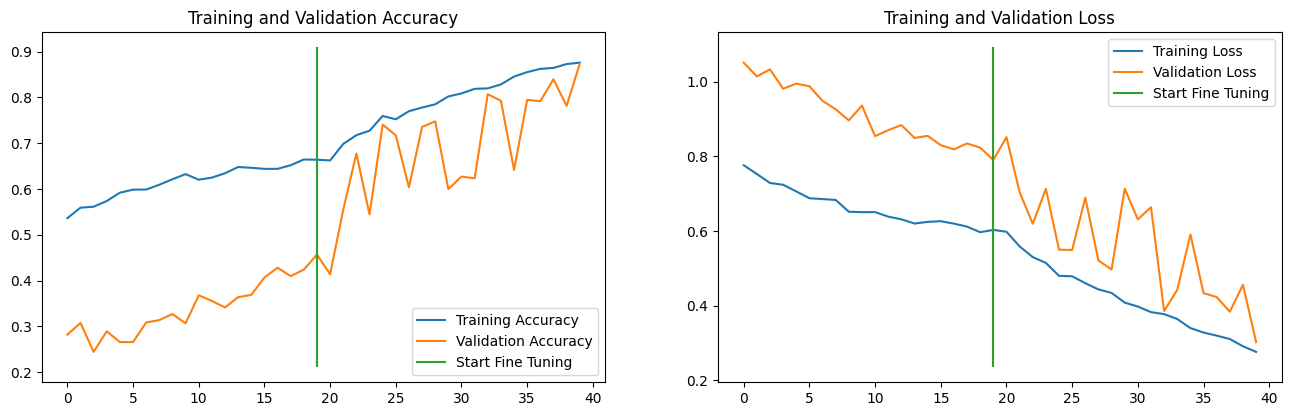

In [37]:
plot_fine_history(history_1, history_1_fine, initial_epochs=len(
    history_1.epoch), final_epochs=len(history_1_fine.epoch),)

Epoch 1/20
82/82 [==============================] - 8s 46ms/step - loss: 1.2868 - accuracy: 0.4731 - val_loss: 0.7023 - val_accuracy: 0.8212
Epoch 2/20
82/82 [==============================] - 3s 31ms/step - loss: 1.0980 - accuracy: 0.6069 - val_loss: 0.6811 - val_accuracy: 0.8376
Epoch 3/20
82/82 [==============================] - 3s 31ms/step - loss: 1.1103 - accuracy: 0.6015 - val_loss: 0.4688 - val_accuracy: 0.9591
Epoch 4/20
82/82 [==============================] - 3s 31ms/step - loss: 0.9693 - accuracy: 0.6720 - val_loss: 0.6636 - val_accuracy: 0.7967
Epoch 5/20
82/82 [==============================] - 2s 30ms/step - loss: 0.9711 - accuracy: 0.6748 - val_loss: 0.7434 - val_accuracy: 0.7385
Epoch 6/20
82/82 [==============================] - 2s 30ms/step - loss: 0.9404 - accuracy: 0.6917 - val_loss: 0.9569 - val_accuracy: 0.5863
Epoch 7/20
82/82 [==============================] - 2s 30ms/step - loss: 0.9226 - accuracy: 0.7075 - val_loss: 0.6563 - val_accuracy: 0.7865
Epoch 8/20
82

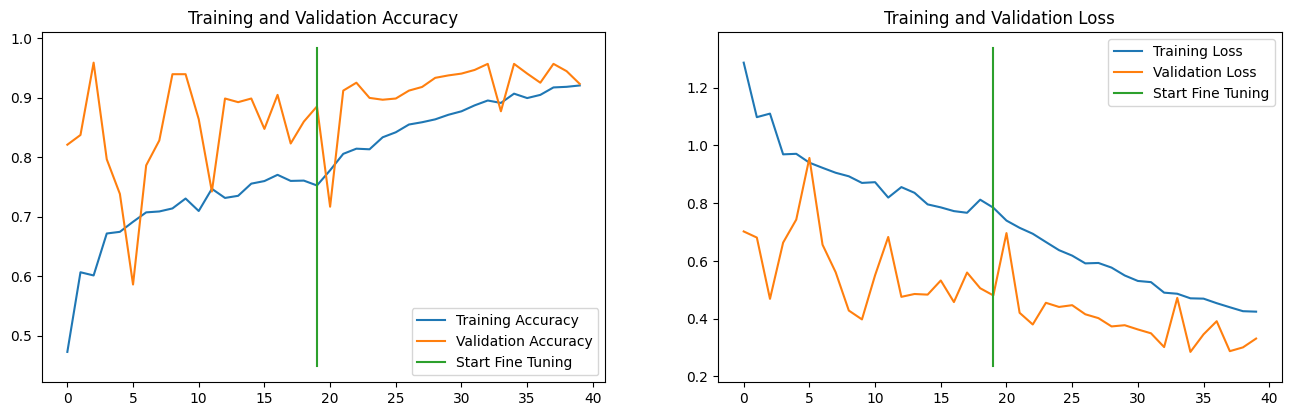

In [49]:
model_2 = ScabiesNet(name="scabies_net_2")

model_2.build((None, *IMG_SIZE, 3))

model_2.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy'],
)

history_2 = model_2.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    class_weight={0: 1.0, 1: 2.0},
)

# Unfreeze the base model
model_2.base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_2.base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again with unfreezed top layers
model_2.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001/10),
    metrics=['accuracy'],
)

# Fine-tune the model
history_2_fine = model_2.fit(
    train_ds,
    epochs=40,
    initial_epoch=len(history_2.epoch),
    validation_data=val_ds,
    class_weight={0: 1.0, 1: 2.0},
)

plot_fine_history(history_2, history_2_fine, initial_epochs=len(
    history_2.epoch), final_epochs=len(history_2_fine.epoch),)

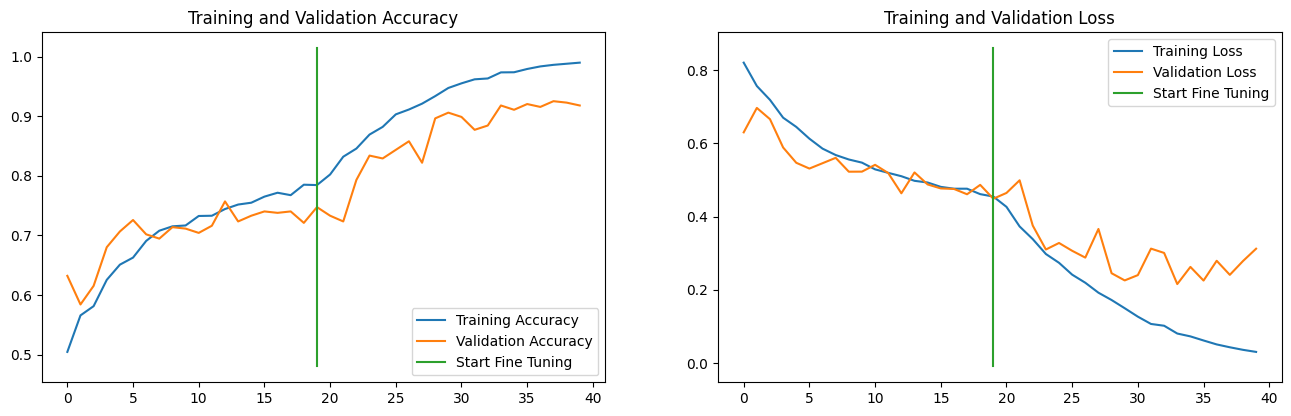

In [32]:
plot_fine_history(history_2, history_2_fine, initial_epochs=len(
    history_2.epoch), final_epochs=len(history_2_fine.epoch),)

In [53]:
model_3 = ScabiesNet(name="scabies_net_3")

model_3.build((None, *IMG_SIZE, 3))

model_3.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')],
)

history_3 = model_3.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    class_weight={0: 1.0, 1: 2.0},
)

# Unfreeze the base model
model_3.base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_3.base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again with unfreezed top layers
model_3.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001/10),
    metrics=[keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')],
)

# Fine-tune the model
history_3_fine = model_3.fit(
    train_ds,
    epochs=60,
    initial_epoch=len(history_3.epoch),
    validation_data=val_ds,
    class_weight={0: 1.0, 1: 2.0},
)

Epoch 1/30
82/82 [==============================] - 9s 49ms/step - loss: 1.2520 - accuracy: 0.4981 - val_loss: 1.1578 - val_accuracy: 0.2758
Epoch 2/30
82/82 [==============================] - 3s 33ms/step - loss: 1.1277 - accuracy: 0.5957 - val_loss: 0.8260 - val_accuracy: 0.6731
Epoch 3/30
82/82 [==============================] - 3s 34ms/step - loss: 1.0507 - accuracy: 0.6340 - val_loss: 0.6212 - val_accuracy: 0.8447
Epoch 4/30
82/82 [==============================] - 3s 33ms/step - loss: 1.0335 - accuracy: 0.6215 - val_loss: 0.7173 - val_accuracy: 0.7763
Epoch 5/30
82/82 [==============================] - 3s 31ms/step - loss: 0.9772 - accuracy: 0.6874 - val_loss: 0.5817 - val_accuracy: 0.8560
Epoch 6/30
82/82 [==============================] - 3s 33ms/step - loss: 0.9235 - accuracy: 0.7063 - val_loss: 0.4353 - val_accuracy: 0.9316
Epoch 7/30
82/82 [==============================] - 3s 33ms/step - loss: 0.9344 - accuracy: 0.6935 - val_loss: 0.5169 - val_accuracy: 0.8836
Epoch 8/30
82

In [62]:
# Custom loss function
class MaskedBinaryCrossentropy(keras.losses.Loss):
    def __init__(self, label_smoothing=0.1, name="masked_binary_crossentropy"):
        super().__init__(name=name)
        self.label_smoothing = label_smoothing
        self.bce = keras.losses.BinaryCrossentropy(
            from_logits=False, label_smoothing=self.label_smoothing, reduction="none",
        )

    def call(self, y_true, y_pred):
        # Assumes the mask is given as 0 for black pixels (masked areas)
        # Create a mask where true labels are non-zero
        mask = tf.cast(y_true != 0, tf.float32)

        # Compute Binary Crossentropy loss
        loss = self.bce(y_true, y_pred)

        # Apply mask: exclude masked areas (0 pixels)
        masked_loss = loss * mask

        # Normalize loss by the number of valid pixels
        return tf.reduce_sum(masked_loss) / tf.reduce_sum(mask)


model_4 = ScabiesNet(name="scabies_net_4")

model_4.build((None, *IMG_SIZE, 3))

model_4.compile(
    loss=MaskedBinaryCrossentropy(label_smoothing=0.1),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')],
)

history_4 = model_4.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    class_weight={0: 1.0, 1: 2.0},
)

# Unfreeze the base model
model_4.base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_4.base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again with unfreezed top layers
model_4.compile(
    loss=MaskedBinaryCrossentropy(label_smoothing=0.1),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001/10),
    metrics=[keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')],
)

# Fine-tune the model
history_4_fine = model_4.fit(
    train_ds,
    epochs=60,
    initial_epoch=len(history_4.epoch),
    validation_data=val_ds,
    class_weight={0: 1.0, 1: 2.0},
)

plot_fine_history(history_4, history_4_fine, initial_epochs=len(
    history_4.epoch), final_epochs=len(history_4_fine.epoch),)

Epoch 1/30
82/82 [==============================] - 7s 40ms/step - loss: nan - accuracy: 0.6255 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/30
82/82 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6250

KeyboardInterrupt: 

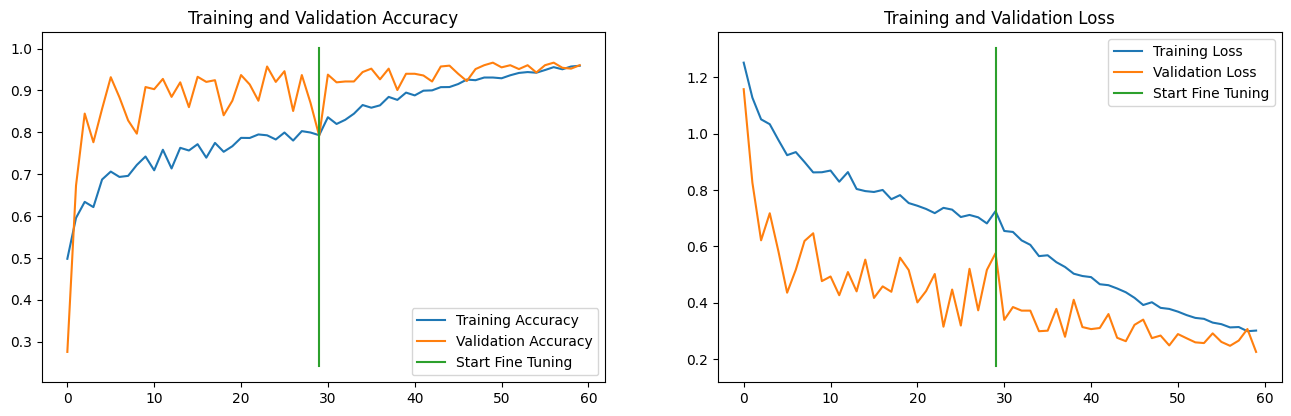

In [54]:
plot_fine_history(history_3, history_3_fine, initial_epochs=len(
    history_3.epoch), final_epochs=len(history_3_fine.epoch),)

In [43]:
model_1.save("./models/scabies_net_1.keras")

In [65]:
model_1 = keras.models.load_model("./models/scabies_net_1.keras", custom_objects={"ScabiesNet": ScabiesNet})

In [39]:
from sklearn.metrics import classification_report
import seaborn as sns

binar_class_names = ['Non-Scabies', 'Scabies']

In [55]:
ddd = np.array([], dtype=np.int64)

for image_batch, labels_batch in test_ds.as_numpy_iterator():
    print(image_batch.shape)
    ddd = np.append(ddd, labels_batch)


(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(48, 128, 128, 3)
(42, 128, 128, 3)


In [56]:
# # Generate predictions
prefered_test_ds = test_ds.as_numpy_iterator()
y_pred = model_3.predict(prefered_test_ds)  # Model predictions
y_pred_classes = tf.where(y_pred < 0.5, 0, 1).numpy().flatten()
# y_true = np.array([labels for _, labels in prefered_test_ds]
#                   ).flatten()
y_true = ddd

14/14 [==============================] - 2s 27ms/step


Classification Report:
              precision    recall  f1-score   support

 Non-Scabies       0.97      0.82      0.89       616
     Scabies       0.23      0.64      0.34        50

    accuracy                           0.81       666
   macro avg       0.60      0.73      0.61       666
weighted avg       0.91      0.81      0.85       666

Confusion Matrix:
tf.Tensor(
[[507 109]
 [ 18  32]], shape=(2, 2), dtype=int32)


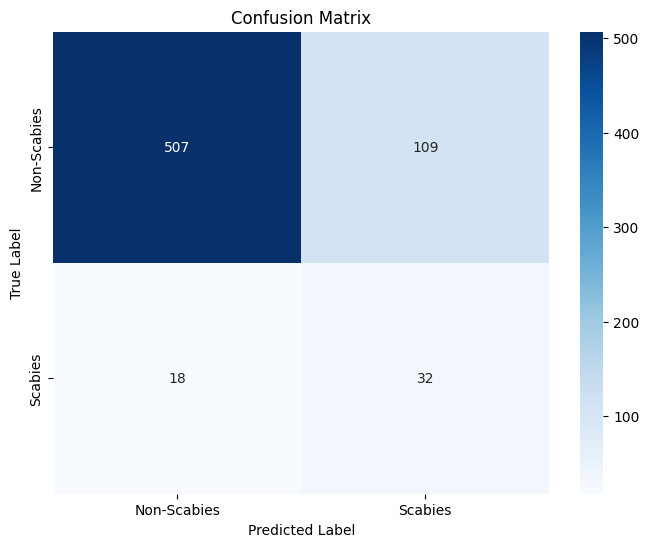

In [57]:
# Generate Classification Report
report = classification_report(
    y_true, y_pred_classes, target_names=binar_class_names)
print("Classification Report:")
print(report)

# Generate Confusion Matrix
cm = tf.math.confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=binar_class_names,
            yticklabels=binar_class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

(48, 128, 128, 3)
(48,)


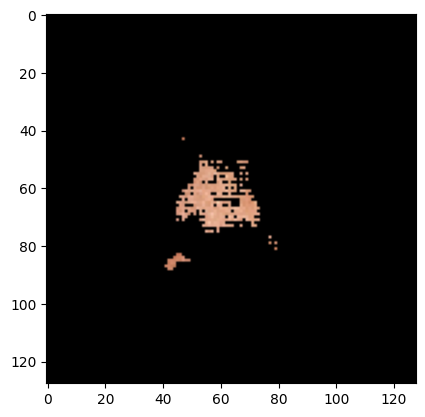

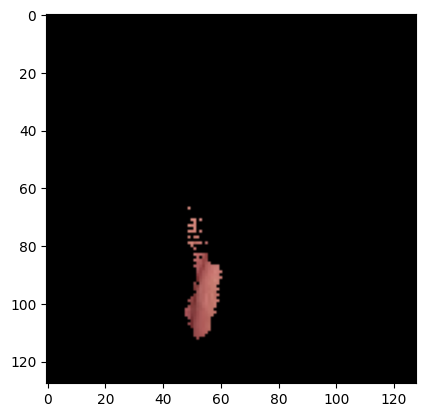

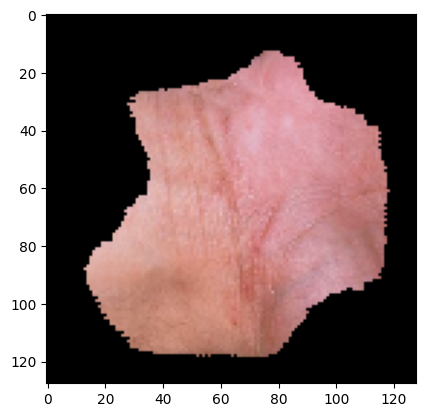

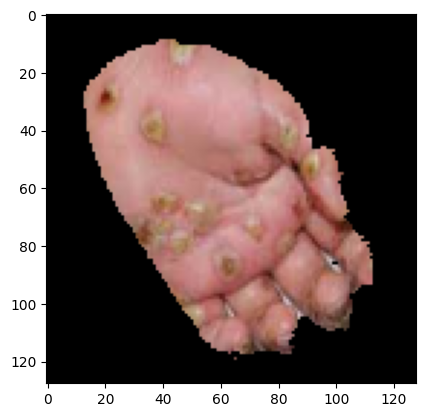

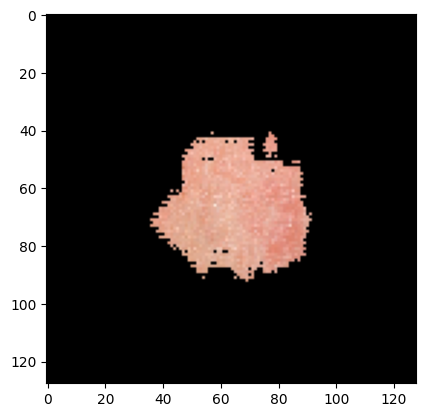

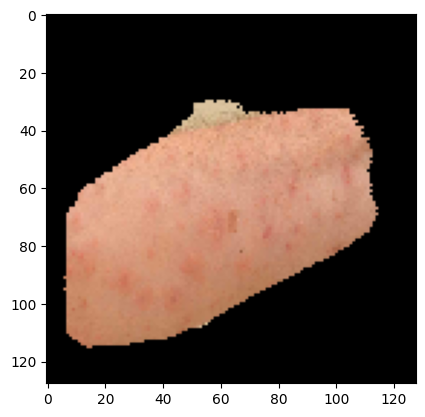

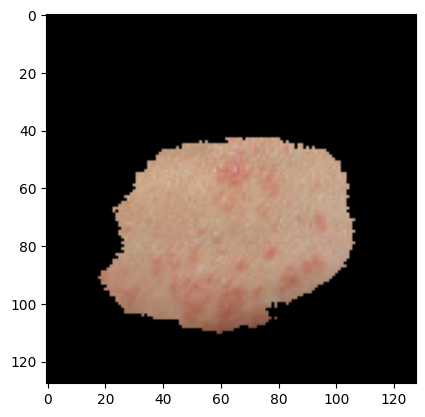

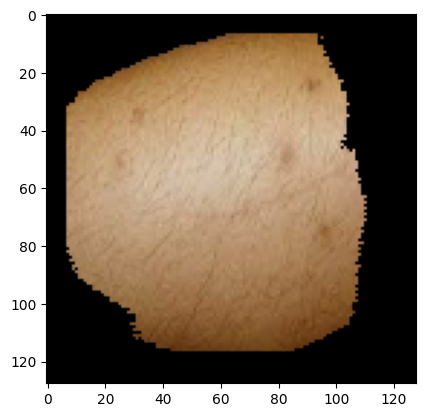

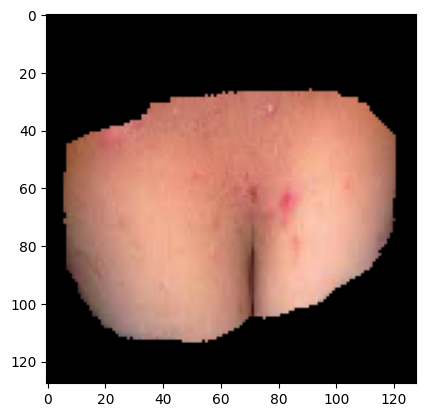

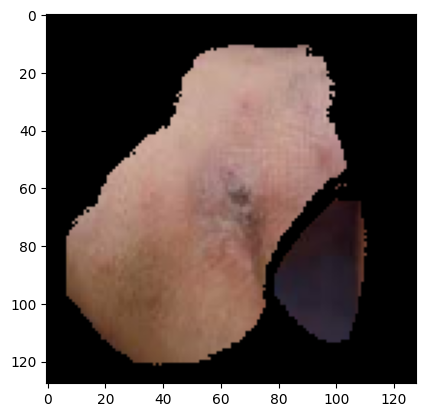

In [47]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    for i in range(10):
        plt.imshow(image_batch[i].numpy().astype(np.uint8))
        plt.show()
    break

In [66]:
!tensorflowjs_converter --input_format=keras \
                           --output_format=tfjs_graph_model \
                           ./models/scabies_net_1.keras \
                           ./models/scabies_net_1_js

2024-12-03 01:02:36.296328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733166156.316980   56997 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733166156.323301   56997 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/media/rayat69/Essentials/Programming/python/dl-1/.venv/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/media/rayat69/Essentials/Programming/python/dl-1/.venv/lib/python3.10/site-packages/tensorflowjs/converters/converter.py", line 959, in 

In [89]:
model_1.build((None, 224, 224, 3))

model_1.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy'],
)

dummy_input = tf.random.normal([1, 224, 224, 3])
_ = model_1(dummy_input)

In [63]:
model_2.save("models/scabiesnetv2")

INFO:tensorflow:Assets written to: models/scabiesnetv2/assets


INFO:tensorflow:Assets written to: models/scabiesnetv2/assets


In [64]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --output_node_names='ScabiesnetV2/Predictions/Reshape_1' \
    --saved_model_tags=serve \
    models/scabiesnetv2 \
    models/scabiesnet/v2

2024-12-05 14:45:56.219365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733388356.312681   39941 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733388356.332688   39941 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
I0000 00:00:1733388359.733836   39941 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1733388359.734603   39941 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1198 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0

In [ ]:
!tensorflowjs_converter --help

In [74]:
model_1.save("./models/scabiesnetv1.keras")

In [75]:
model_2 = keras.models.load_model("./models/scabiesnetv1.keras", custom_objects={"ScabiesNet": ScabiesNet})

In [76]:
!tensorflowjs_converter --input_format=keras \
                           --output_format=tfjs_graph_model \
                           ./models/scabiesnetv1.keras \
                           ./models/scabiesnet/v1

2024-12-03 01:16:21.650785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733166981.668949   57618 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733166981.674202   57618 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/media/rayat69/Essentials/Programming/python/dl-1/.venv/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/media/rayat69/Essentials/Programming/python/dl-1/.venv/lib/python3.10/site-packages/tensorflowjs/converters/converter.py", line 959, in 